<Axes: >

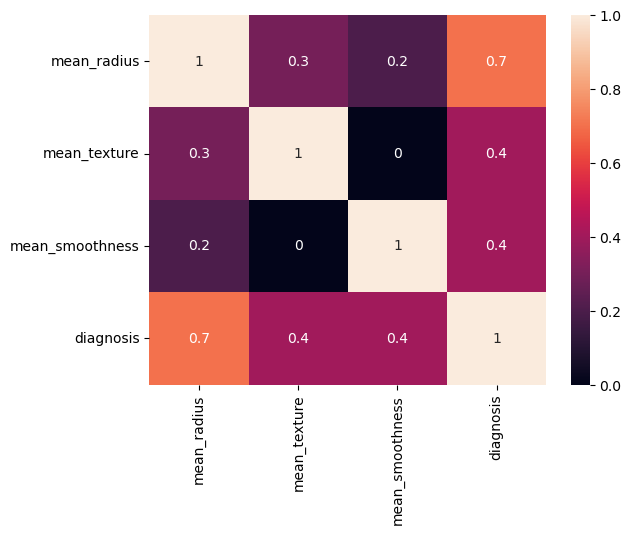

In [3]:
import sklearn 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import tree 
from sklearn.model_selection import train_test_split

PATH = "Breast_cancer_data.csv" 
COLUMNS_FOR_FACTORISATION = [] 
dataset = pd.read_csv(PATH) 
factorization_table = {} 
dataset.drop( [ "mean_perimeter", "mean_area", ], axis=1, inplace=True, ) 
for column in dataset.columns: 
    if column in COLUMNS_FOR_FACTORISATION:
        dataset[column], table = pd.factorize(dataset[column]) 
        factorization_table[column] = pd.DataFrame( columns=[column], data=table ) 
dataset

sns.heatmap(round(abs(dataset.corr()), 1, ), annot=True)

Text(0.5, 1.0, 'Матрица сходства')

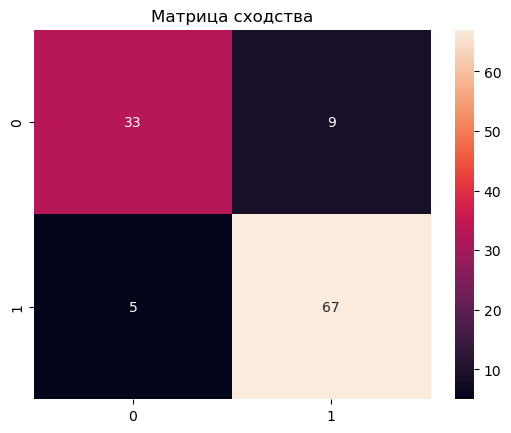

In [4]:
train_input, test_input, train_output, test_output = train_test_split( dataset.drop("diagnosis", axis=1), dataset["diagnosis"], test_size=0.2 )

model = tree.DecisionTreeClassifier() 
model.fit(train_input, train_output) 
predictions = model.predict(test_input) 
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output) 
sns.heatmap( confusion_matrix, annot=True ) 
plt.title('Матрица сходства')

Text(0.5, 1.0, 'Дерево решений')

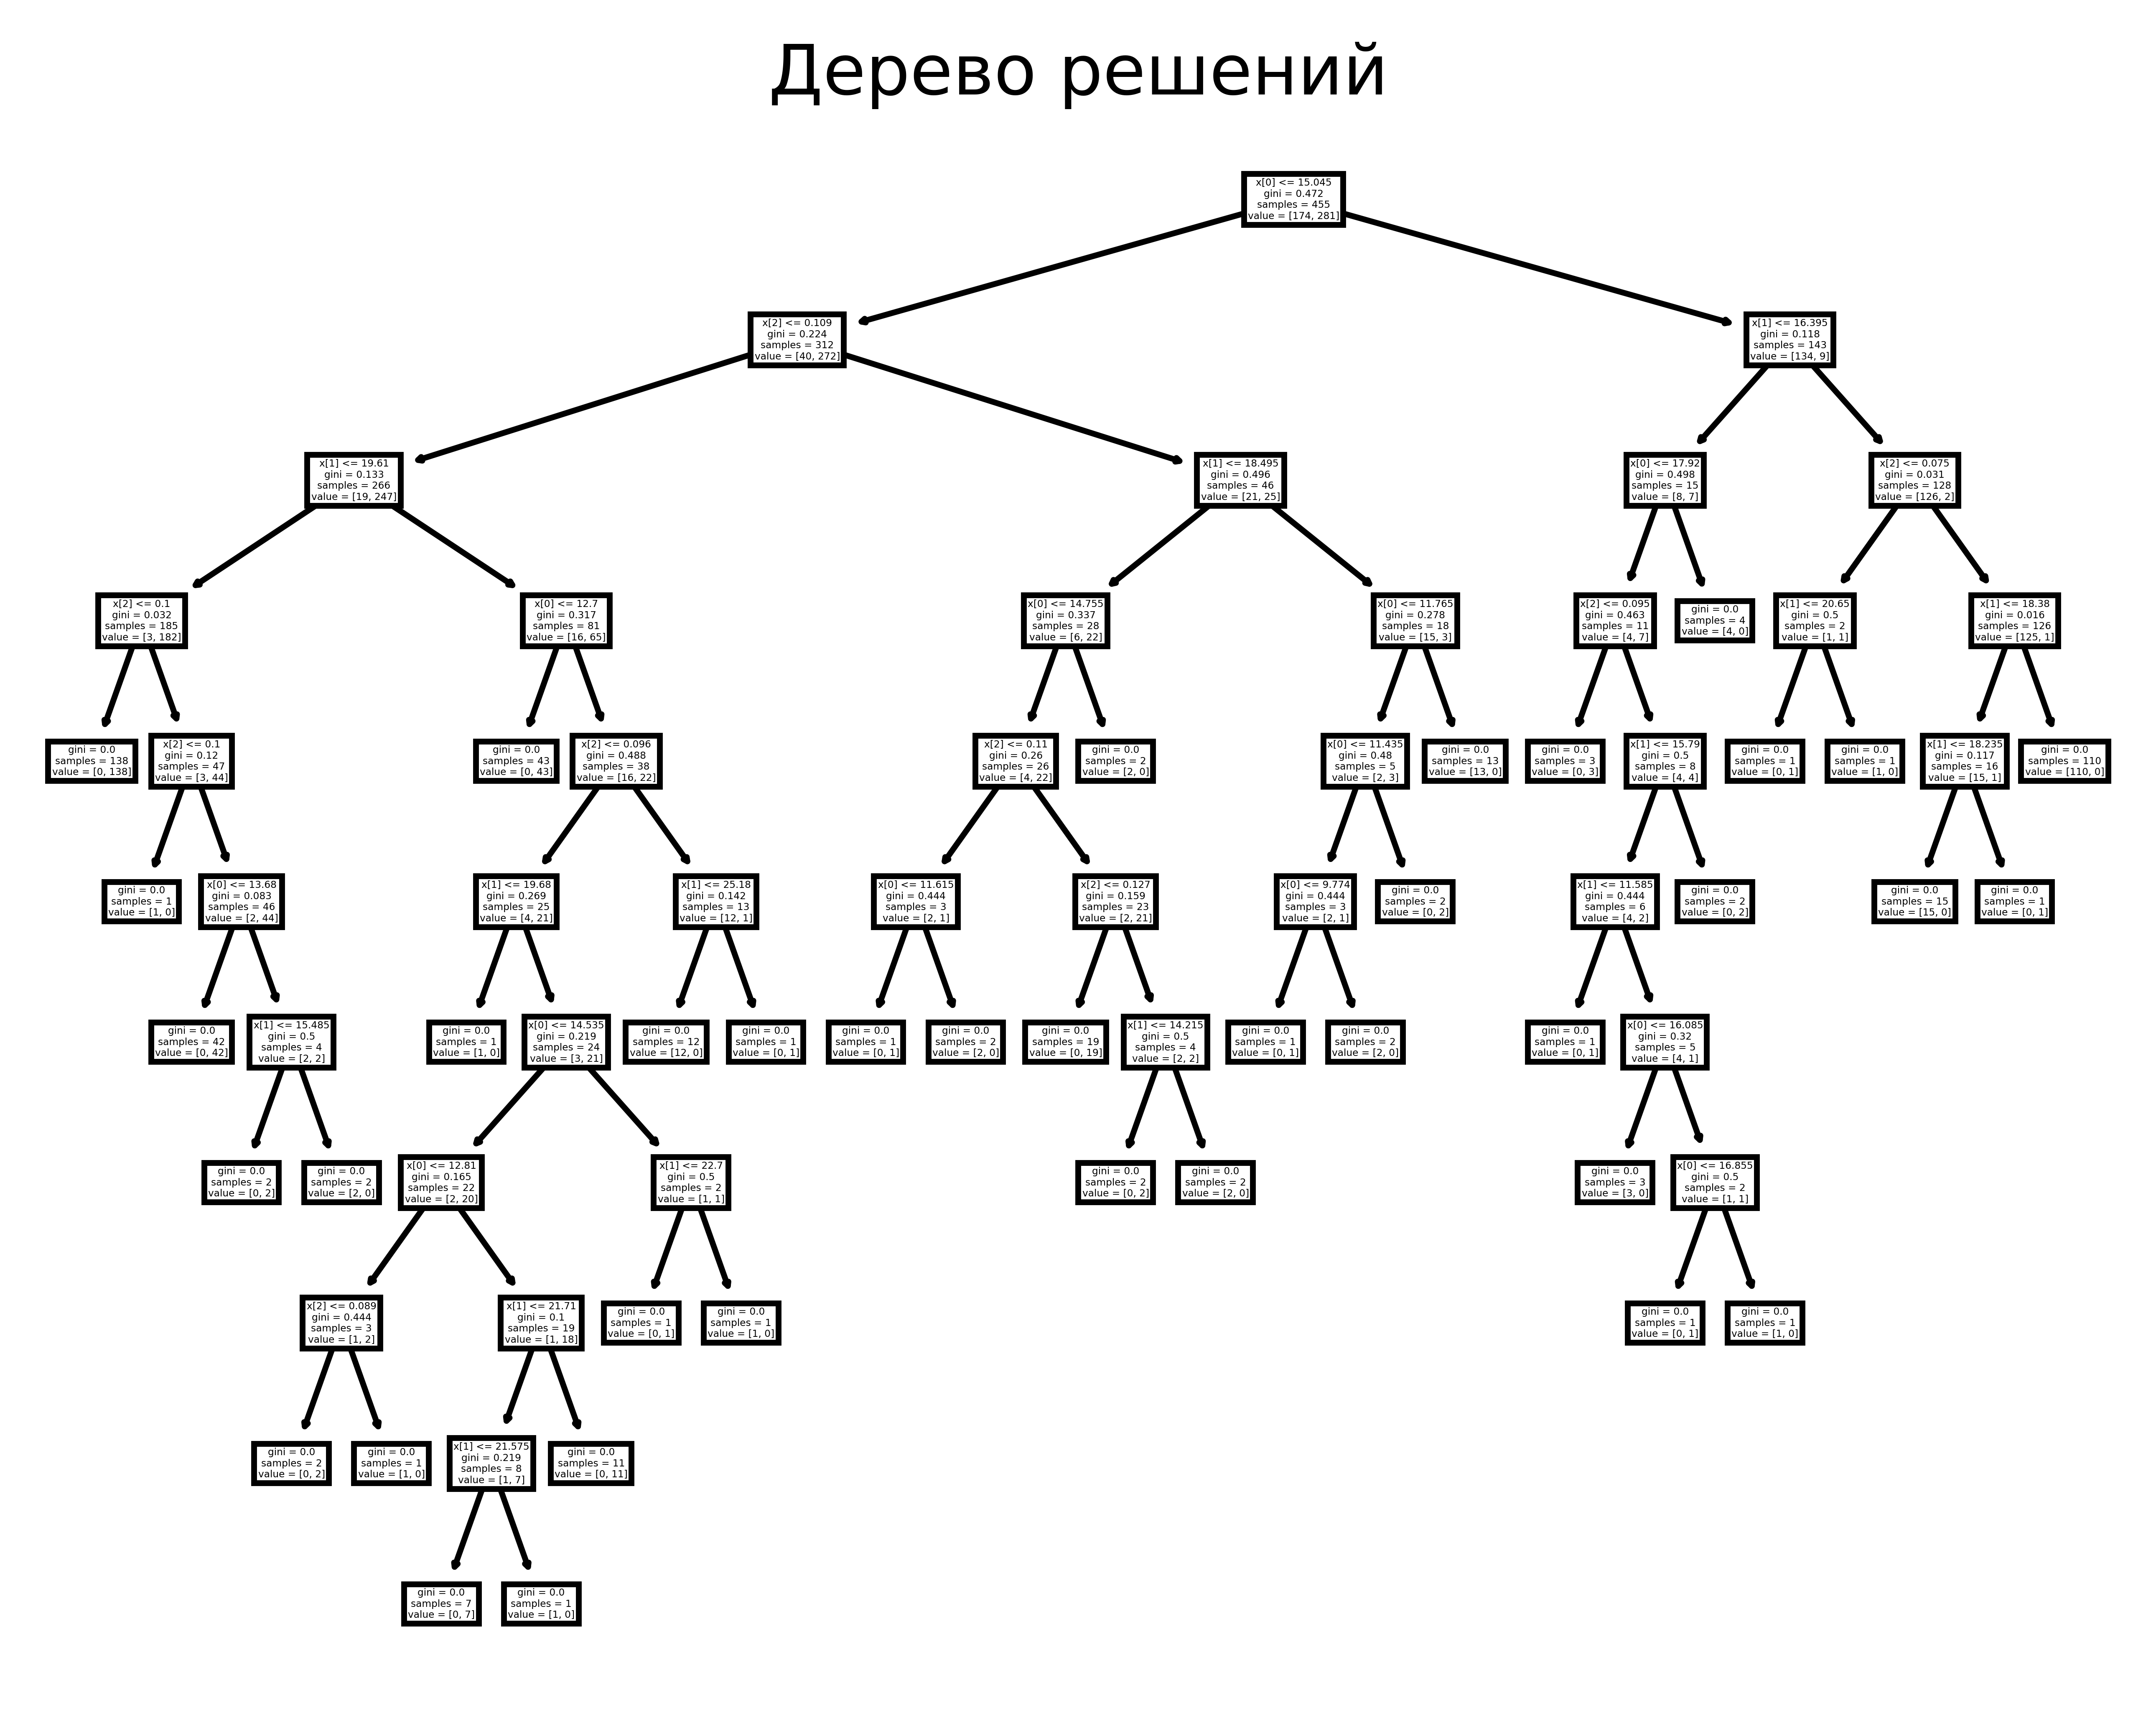

In [10]:
DPI = 1000
plt.figure(dpi=DPI) 
tree.plot_tree(model) 
plt.title("Дерево решений")